<a href="https://colab.research.google.com/github/tharun-229/-AIML/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Types of Each Feature:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary Statistics for Numeric Features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     89

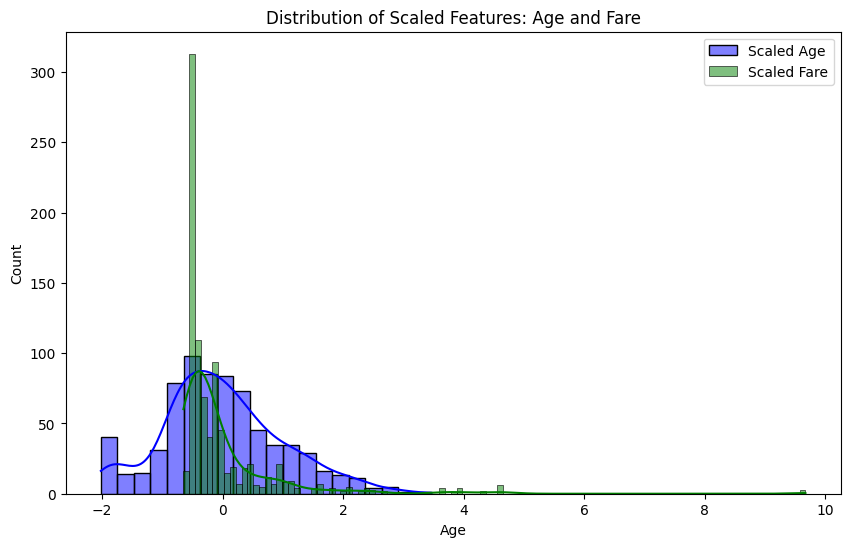

In [ ]:
# Importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print("Data Types of Each Feature:")
print(df.dtypes)

summary_stats = df.describe(percentiles=[.25, .5, .75, .9])
print("\nSummary Statistics for Numeric Features:")
print(summary_stats)

print("\nColumn Names in the Dataset:")
print(df.columns)

numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\nFirst 5 Rows of Scaled Data:")
print(df_scaled.head())

plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['Age'], kde=True, color='blue', label='Scaled Age')
sns.histplot(df_scaled['Fare'], kde=True, color='green', label='Scaled Fare')
plt.legend()
plt.title('Distribution of Scaled Features: Age and Fare')
plt.show()

In [ ]:
# Importing required packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df['Age'] = df['Age'].fillna(df['Age'].median())
df = df.dropna(subset=['Embarked', 'Survived'])

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = df['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy of the KNN model: {accuracy * 100:.2f}%')

print(f"Predictions on the test set: {Y_pred[:10]}")

Accuracy of the KNN model: 69.66%
Predictions on the test set: [0 1 1 1 0 0 0 0 1 1]


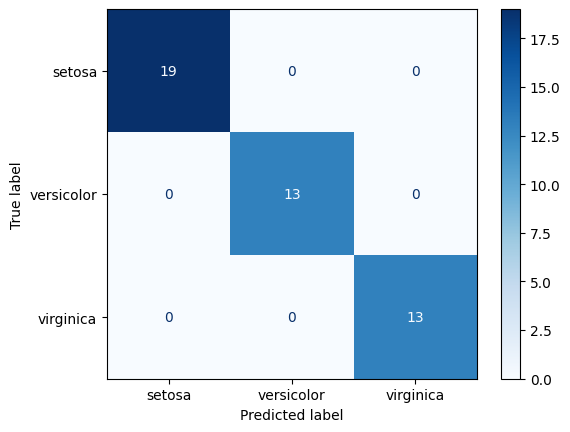

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
cm_display.plot(cmap="Blues")
